In [1]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import sklearn
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [3]:
import torch
import torch.nn as nn
import torch.optim 
from torchvision.transforms import ToTensor

In [5]:
def sklearn_to_df(sklearn_dataset):
    df = pd.DataFrame(sklearn_dataset.data, columns=sklearn_dataset.feature_names)
    df['target'] = pd.Series(sklearn_dataset.target)
    return df

In [6]:
df_iris = sklearn_to_df(load_iris())

In [7]:
df_iris.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [8]:
df_iris.describe().T

,count,mean,std,min,25%,50%,75%,max
sepal length (cm),150.0,5.843333,0.828066,4.3,5.1,5.80,6.4,7.9
sepal width (cm),150.0,3.057333,0.435866,2.0,2.8,3.00,3.3,4.4
petal length (cm),150.0,3.758000,1.765298,1.0,1.6,4.35,5.1,6.9
petal width (cm),150.0,1.199333,0.762238,0.1,0.3,1.30,1.8,2.5
target,150.0,1.000000,0.819232,0.0,0.0,1.00,2.0,2.0


In [9]:
# Finding missing values

df_iris.isnull().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
target               0
dtype: int64

In [10]:
df_iris.nunique()

sepal length (cm)    35
sepal width (cm)     23
petal length (cm)    43
petal width (cm)     22
target                3
dtype: int64

In [11]:
df_iris['target'].unique()
# 0 - Iris Setosa
# 1 - Iris Versicolor
# 2 - Iris Virginia

array([0, 1, 2])

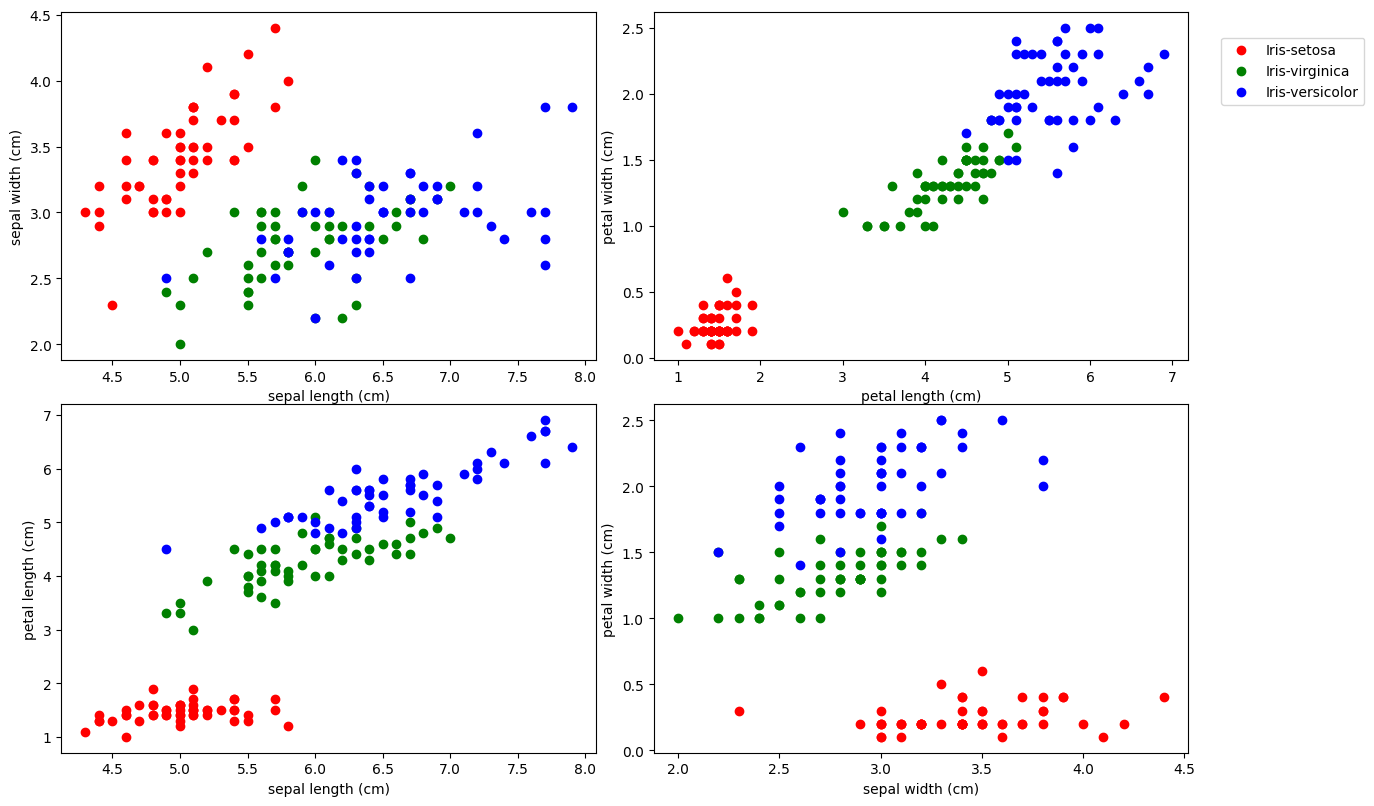

In [12]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12,8))
fig.tight_layout()

plots = [(0,1),(2,3),(0,2),(1,3)]
colors = ["r", "g", "b"]
labels = ["Iris-setosa","Iris-virginica","Iris-versicolor"]

for i, ax in enumerate(axes.flat):
    for j in range(3):
        x = df_iris.columns[plots[i][0]]
        y = df_iris.columns[plots[i][1]]
        ax.scatter(df_iris[df_iris["target"]==j][x], df_iris[df_iris["target"]==j][y], color=colors[j])
        ax.set(xlabel=x, ylabel=y)

fig.legend(labels=labels, loc=3, bbox_to_anchor=(1.0,0.85))
plt.show()

In [13]:
X = df_iris.drop(["target"],axis=1).values
y = df_iris["target"].values

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=43)

In [57]:
scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [58]:
X_train = torch.tensor(X_train, dtype=torch.long)
X_test = torch.tensor(X_test, dtype=torch.long)
y_train = torch.tensor(y_train, dtype=torch.long)
y_test = torch.tensor(y_test, dtype=torch.long)


In [166]:
class Classifier(nn.Module):
    def __init__(self, input, output):
        super(Classifier, self).__init__()
        self.input_layer = nn.Linear(input, 128)
        self.layer1 = nn.Linear(128, 64)
        # self.layer2 = nn.Linear(64, 64)
        self.output_layer = nn.Linear(64, output)
        self.softmax = nn.Softmax(dim=1)

    # def forward(self, x): 
    #     x = x.to(self.input_layer.weight.dtype)  
    #     out = self.softmax(self.input_layer(x))
    #     out = self.softmax(self.layer1(out))
    #     # out = self.softmax(self.layer2(out))
    #     out = self.output_layer(out)
    #     return out
    
    def forward(self, x): 
        x = x.to(self.input_layer.weight.dtype)  
        out = self.input_layer(x)
        out = self.layer1(out)
        # out = self.softmax(self.layer2(out))
        out = self.softmax(self.output_layer(out))
        return out

In [167]:
input = 4
output = 3
model = Classifier(input, output)

In [168]:
criterion = nn.CrossEntropyLoss()
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

In [169]:
def training(model, optimiser, criterion, X_train, y_train, X_test, y_test, epochs, train_loss, test_loss):
    for epoch in range(epochs):
        optimiser.zero_grad()
        output_train = model(X_train)
        loss_train = criterion(output_train, y_train)
        loss_train.backward()
        optimiser.step()

        output_test = model(X_test)
        loss_test = criterion(output_test, y_test)
        train_loss[epoch] = loss_train.item()
        test_loss[epoch] = loss_test.item()

        if (epoch + 1) % 50 == 0:
            print(f"Epoch {epoch+1}/{epochs}, Train Loss: {loss_train.item():.4f}, Test Loss: {loss_test.item():.4f}")

    
    

In [170]:
epochs = 1000
train_loss = np.zeros(epochs)
test_loss = np.zeros(epochs)

In [171]:
training(model, optimiser, criterion, X_train, y_train, X_test, y_test, epochs, train_loss, test_loss)

Epoch 50/1000, Train Loss: 0.6562, Test Loss: 0.6603
Epoch 100/1000, Train Loss: 0.6562, Test Loss: 0.6542
Epoch 150/1000, Train Loss: 0.6562, Test Loss: 0.6508
Epoch 200/1000, Train Loss: 0.6562, Test Loss: 0.6480
Epoch 250/1000, Train Loss: 0.6562, Test Loss: 0.6456
Epoch 300/1000, Train Loss: 0.6562, Test Loss: 0.6436
Epoch 350/1000, Train Loss: 0.6562, Test Loss: 0.6419
Epoch 400/1000, Train Loss: 0.6562, Test Loss: 0.6404
Epoch 450/1000, Train Loss: 0.6562, Test Loss: 0.6391
Epoch 500/1000, Train Loss: 0.6562, Test Loss: 0.6380
Epoch 550/1000, Train Loss: 0.6562, Test Loss: 0.6371
Epoch 600/1000, Train Loss: 0.6562, Test Loss: 0.6363
Epoch 650/1000, Train Loss: 0.6562, Test Loss: 0.6355
Epoch 700/1000, Train Loss: 0.6562, Test Loss: 0.6348
Epoch 750/1000, Train Loss: 0.6562, Test Loss: 0.6342
Epoch 800/1000, Train Loss: 0.6562, Test Loss: 0.6337
Epoch 850/1000, Train Loss: 0.6562, Test Loss: 0.6332
Epoch 900/1000, Train Loss: 0.6562, Test Loss: 0.6327
Epoch 950/1000, Train Loss: 0

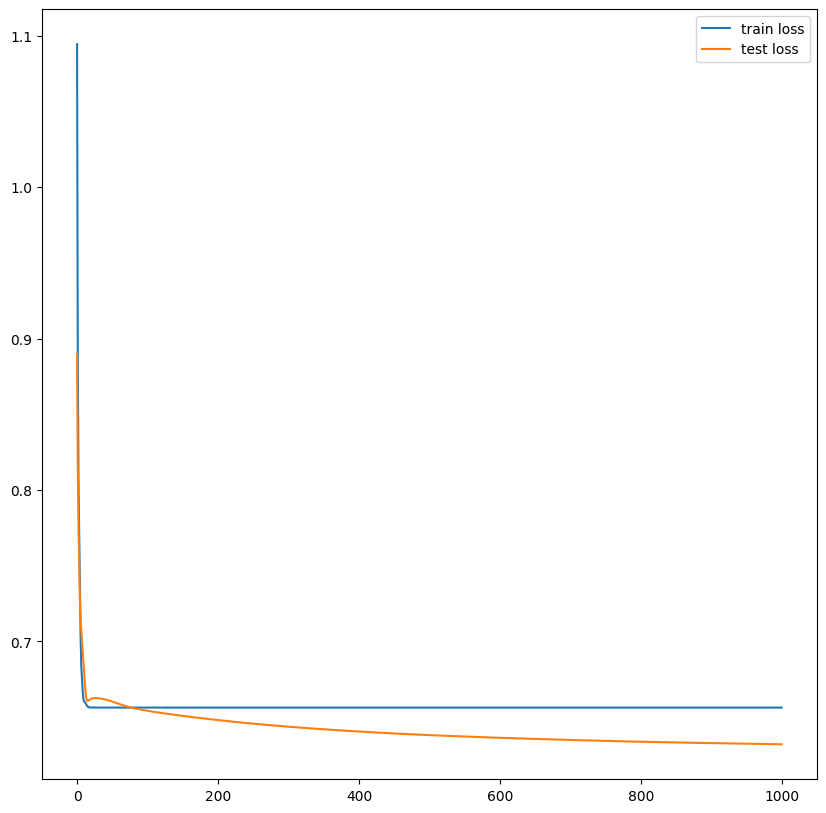

In [172]:
plt.figure(figsize=(10,10))
plt.plot(train_loss, label='train loss')
plt.plot(test_loss, label='test loss')
plt.legend()
plt.show()

In [173]:
predictions_train = []
predictions_test =  []
with torch.no_grad():
    predictions_train = model(X_train)
    predictions_test = model(X_test)

In [174]:
def get_accuracy(pred_arr,original_arr):
    if len(pred_arr)!=len(original_arr):
        return False
    pred_arr = pred_arr.numpy()
    original_arr = original_arr.numpy()
    final_pred= []
    # we will get something like this in the pred_arr [32.1680,12.9350,-58.4877]
    # so will be taking the index of that argument which has the highest value here 32.1680 which corresponds to 0th index
    for i in range(len(pred_arr)):
        final_pred.append(np.argmax(pred_arr[i]))
    final_pred = np.array(final_pred)
    count = 0
    #here we are doing a simple comparison between the predicted_arr and the original_arr to get the final accuracy
    for i in range(len(original_arr)):
        if final_pred[i] == original_arr[i]:
            count+=1
    return count/len(final_pred)

In [175]:
train_acc = get_accuracy(predictions_train,y_train)
test_acc  = get_accuracy(predictions_test,y_test)

In [176]:
print(f"Training Accuracy: {round(train_acc*100,3)}")
print(f"Test Accuracy: {round(test_acc*100,3)}")

Training Accuracy: 89.524
Test Accuracy: 93.333
